In [61]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from collections import Counter
from cleantext import clean
import nltk
# pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', 150)
#The prints of the data has been commented out such that the resulting pdf would not be huge
#Simply uncomment them in their respective cells to see the effects of cleaning and execute
#All the cells

In [62]:
#Part 1
#a)
cpr_example_data = '''140598-1773
1405981773
1209445676'''

#Compiling the regex to get the matching pattern
pattern = re.compile(r"(0[1-9]|[12][0-9]|3[01])(0[1-9]|1[1,2])([0-9][0-9])-?([0-9][0-9][0-9][0-9])")

# Iterating through the data
for cpr in cpr_example_data.split():
    #Checking if there is a match with our pattern object
    match = pattern.match(cpr)
    #Printing the CPR-number if there is a match, as well as the 4 groups (dd),(mm),(yy),(llll)
    if match:
        print(cpr)
        print(match.groups())

#b)
def relevant_century(llll, yy):
    '''Given the last 4 digits of a CPR and the 2-digits signifying the year
    return the relevant centure as of the table given in the assignment text. The function
    assumes correct input is given'''
    if llll in range(4000) and yy in range(100):
        return 1900
    if llll in range(4000, 5000) and yy in range(37):
        return 2000
    if llll in range(4000, 5000) and yy in range(37, 99):
        return 1900
    if llll in range(5000, 9000) and yy in range(58):
        return 2000
    if llll in range(5000, 9000) and yy in range(58, 100):
        return 1800
    if llll in range(9000, 10000) and yy in range(37):
        return 2000
    if llll in range(9000, 10000) and yy in range(37, 100):
        return 1900
            
#Example usage of relevant_century the function:
print('Example usage of relevant_century: ', relevant_century(1773, 98))


140598-1773
('14', '05', '98', '1773')
1405981773
('14', '05', '98', '1773')
1209445676
('12', '09', '44', '5676')
Example usage of relevant_century:  1900


In [63]:
#1.
#Reading the CSV-file into a data-frame
news_data = pd.read_csv("news_sample.csv")

In [64]:
#2.
#The data has completely empty columns which i remove. Also when i inspected the data i found
#the contents column to contain the most data and it is super unstructured (mainly due to
#crazy spacing between paragraphs and such). I fix this following the steps provided for (3.)

#Dropping completely empty columns
news_data = news_data.dropna(axis=1, how='all')

#Extracting the data of interest namely the content column:
content_column = news_data['content']

print(content_column)

0      Sometimes the power of Christmas will make you do wild and wonderful things. You do not need to believe in the Holy Trinity to believe in the posi...
1      AWAKENING OF 12 STRANDS of DNA – “Reconnecting with You” Movie\n\n% of readers think this story is Fact. Add your two cents.\n\nHeadline: Bitcoin ...
2      Never Hike Alone: A Friday the 13th Fan Film USA | 2017 | 54 min A fan tribute to Friday the 13th, Never Hike Alone follows an adventure\n\nNever ...
3      When a rare shark was caught, scientists were left blundering for answers. This shark has a unique feature. And it’s not that it can survive at ex...
4      Donald Trump has the unnerving ability to ability to create his own reality and convince millions of Americans that what he says it is true. The p...
5                 “Republicans and Democrats alike are willing to turn over government coffers to Bezos and his ilk and the rights of the people be damned.”
6      Could you imagine waking up in the morgue? I for on

In [65]:
#3.
'''I assume we're supposed to clean the data in the 'content' column since
it is the data that would be the most interesting to clean. Thus the input to the method
 should be each element in the content_column.'''

def clean_text(raw_text):
    '''Function for cleaning the raw_text input data'''

    # making all the words in the text lowercase
    raw_text = raw_text.lower() 

    #Replacing multiple whitespaces, tabs or newlines with single whitespace
    raw_text = re.sub(r'\s+', ' ', raw_text) 

    #Replaces numbers of for example the format: $3,500 with <NUM>
    raw_text = re.sub(r'\$?\d+,?\d+', '<NUM>', raw_text)

    #Replaces dates of for example the format (which is present in the data):
    # January 24, 2018 with <DATE>
    raw_text = re.sub(r'\b(\w+\s)(\d{2})(th)?,?(\s\d{4})\b', '<DATE>', raw_text)

    #replacing emails of for example the format (which is present in the data):
    # info@treadwells-london.com with <EMAIL>
    # and my own emil.oerum@hotmail.com
    raw_text = re.sub(r'\b\w+\W?\w*@\w+\W?\w+\.\w{2,3}\b', '<EMAIL>', raw_text)

    #replacing URL's of for example the format (which is present in the data):
    # https://www.treadwells-london.com/ with <URL>
    # as well as many others with only http (no s) or no prefix at all.
    raw_text = re.sub(r'(https?://)?(www\.)?\w+-?\.?\w+\.\w{2,3}/?', '<URL>', raw_text)

    return raw_text


#Applying the our clean_text() function to each element
#in the 'content' column in our dataframe:
content_column_cleaned = content_column.apply(clean_text)

# print(content_column_cleaned)

In [66]:
#4
#Using the clean-text module to clean the data:

#Reading in the data to a dataframe once again to not interfere with the manually
#cleaned data
news_data2 = pd.read_csv('news_sample.csv')
content_column2 = news_data2['content']

#Calling the clean function from the clean-text module with the appropriate arguments
# to achieve similar functionality as the manually created clean-text function.
# this however does not support substitution of dates in the data
content_column2_cleaned = content_column2.apply(lambda x : clean(x,
    lower=True,                    
    no_line_breaks=True,           
    no_urls=True,                  
    no_emails=True,                
    no_numbers=True,               
    no_currency_symbols=True,      
    no_punct=True,                 
    replace_with_punct="",         
    replace_with_url="_URL_",
    replace_with_email="_EMAIL_",
    replace_with_number="_NUM_",
    replace_with_currency_symbol="_CUR_",
    lang="en"  ))                    

print(content_column2_cleaned)


0      sometimes the power of christmas will make you do wild and wonderful things you do not need to believe in the holy trinity to believe in the posit...
1      awakening of num strands of dna reconnecting with you movie of readers think this story is fact add your two cents headline bitcoin blockchain sea...
2      never hike alone a friday the 13th fan film usa | num | num min a fan tribute to friday the 13th never hike alone follows an adventure never hike ...
3      when a rare shark was caught scientists were left blundering for answers this shark has a unique feature and its not that it can survive at extrem...
4      donald trump has the unnerving ability to ability to create his own reality and convince millions of americans that what he says it is true the pr...
5                    republicans and democrats alike are willing to turn over government coffers to bezos and his ilk and the rights of the people be damned
6      could you imagine waking up in the morgue i for one

In [69]:
# Read the original dataset
original_df = pd.read_csv('news_sample.csv')

# Clean the specific column (assuming column name is 'column_to_clean')
# Replace 'cleaned_column' with your cleaned version
cleaned_column = original_df['content'].apply(lambda x : clean(x,
    lower=True,                    
    no_line_breaks=True,           
    no_urls=True,                  
    no_emails=True,                
    no_numbers=True,               
    no_currency_symbols=True,      
    no_punct=True,                 
    replace_with_punct="",         
    replace_with_url="_URL_",
    replace_with_email="_EMAIL_",
    replace_with_number="_NUM_",
    replace_with_currency_symbol="_CUR_",
    lang="en"  ))                    

# Replace the original column with the cleaned version
original_df['content'] = cleaned_column

original_df.dropna(axis=1, how='all', inplace=True)
print(original_df)

# Save the modified DataFrame to a new CSV file
# original_df.to_csv('news_data_cleaned.csv', index=False)

     Unnamed: 0     id                     domain        type  \
0             0    141                    awm.com  unreliable   
1             1    256          beforeitsnews.com        fake   
2             2    700                cnnnext.com  unreliable   
3             3    768                    awm.com  unreliable   
4             4    791       bipartisanreport.com   clickbait   
5             5    899      blackagendareport.com  unreliable   
6             6   1058           awarenessact.com  conspiracy   
7             7   1376          beforeitsnews.com        fake   
8             8   1411          beforeitsnews.com        fake   
9             9   1422        canadafreepress.com  conspiracy   
10           10   1570          beforeitsnews.com        fake   
11           11   1664          christianpost.com    reliable   
12           12   1685           charismanews.com        bias   
13           13   1771          beforeitsnews.com        fake   
14           14   1920   

Unique words after preprocessing:  16810
Unique words before preprocessing:  20947


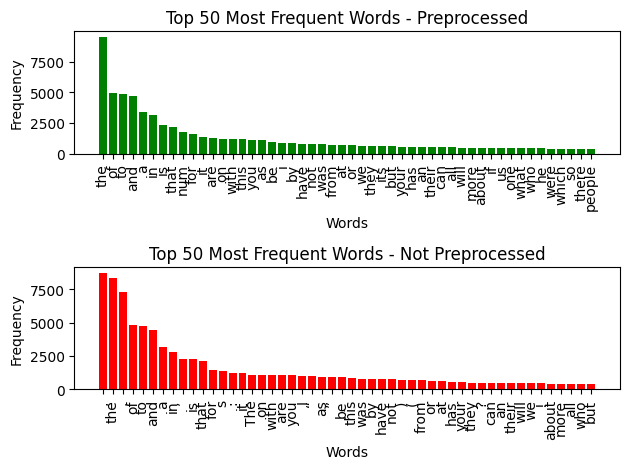

In [68]:
#Part 3
#1.
'''Calculating the number of unique words in the data after preprocessing and comparing it to 
# the number of unique words before preprocessing (i.e. in the raw data):

#We can use the Counter module to do this - to make this easier we need to tokenize the
#content_column using the nltk library:'''

#Calculating the number of unique words in the data after preprocessing:

#Tokenization
content_column2_cleaned_and_tokenized = content_column2_cleaned.apply(lambda x: nltk.word_tokenize(x))

#Creating series of dictionaries containing words and their frequencies
word_frequency_preprocessed = content_column2_cleaned_and_tokenized.apply(lambda x: Counter(x))

#Merging dictionaries into one
combined_counter_preprocessed = word_frequency_preprocessed.sum()

#Calculating the length aka the unique words after preprocessing:
unique_words_after_preprocessing = len(combined_counter_preprocessed)

print('Unique words after preprocessing: ', unique_words_after_preprocessing)

#Calculating the number of unique words in the data before preprocessing:

#Tokenization
content_column2_tokenized = content_column2.apply(lambda x : nltk.word_tokenize(x))

#Creating series of dictionaries containing words and their frequencies
word_frequency_not_preprocessed = content_column2_tokenized.apply(lambda x: Counter(x))

#Merging dictionaries into one
combined_counter_not_preprocessed = word_frequency_not_preprocessed.sum()

#Calculating the length aka the unique words before preprocessing:
unique_words_before_preprocessing = len(combined_counter_not_preprocessed)

print('Unique words before preprocessing: ', unique_words_before_preprocessing)

#2
'''Calculating how frequently each of these words is used in the dataset and
plotting the top 50 most frequent words in a bar plot (Both preprocessed and not preprocessed) '''

#Sorting the counter object after the most common ones
sorted_word_frequency_preprocessed = combined_counter_preprocessed.most_common()

#Extracting the top 50 most common words
top_50_words_preprocessed = sorted_word_frequency_preprocessed[:50]

#unzipping the tuples in top_50_words_preprocessed containing the words and their corresponding
#frequency into seperate values to be able to plot them
words_preprocessed, frequencies_preprocessed = zip(*top_50_words_preprocessed)

#Plotting
plt.subplot(2, 1, 1)
plt.bar(words_preprocessed, frequencies_preprocessed, color='green')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 50 Most Frequent Words - Preprocessed')
plt.xticks(rotation=90)

#Sorting the counter object after the most common ones
sorted_word_frequency_not_preprocessed = combined_counter_not_preprocessed.most_common()

#Extracting the top 50 most common words
top_50_words_not_preprocessed = sorted_word_frequency_not_preprocessed[:50]

#unzipping the tuples in top_50_words_preprocessed containing the words and their corresponding
#frequency into seperate values to be able to plot them
words_not_preprocessed, frequencies_not_preprocessed = zip(*top_50_words_not_preprocessed)

#Plotting
plt.subplot(2, 1, 2)
plt.bar(words_not_preprocessed, frequencies_not_preprocessed, color='red')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 50 Most Frequent Words - Not Preprocessed')
plt.xticks(rotation=90)

plt.tight_layout()

plt.show()


